In [18]:
using Distributions
using Plots

In [19]:
λ = 2
X = Poisson(λ)
Distributions.Poisson{Float64}(λ)

n = 5
p = 0.21

Y = Binomial(n, p)
Distributions.Binomial{Float64}(n,p)

Binomial{Float64}(n=5, p=0.21)

In [20]:
#defining the cdf of Poisson Distribution
function cdf(n)
    sum = 0
    for i in 1:n
        sum = sum + pdf(X,i)
    end
    return sum
end

cdf (generic function with 1 method)

In [21]:
function draw_poisson(λ,u)
    flag = 0
    I = floor(λ)
    while flag == 0
        if ((u > cdf(I-1)) && (u < cdf(I)))
            flag = 1
            return I
        elseif(u > cdf(I))
            I = I + 1
        else 
            I = I - 1
        end
    end
end    

draw_poisson (generic function with 1 method)

In [22]:
function draw_binomial(n,p)
    accept = 0
    x = zeros(n)
    all_c = zeros(n)
    for i in 1:n
        all_c[i] = pdf(Y,i)/pdf(X,i)
    end
    c=max(all_c,n)
    while accept == 0
        u = rand(Uniform(0,1))
        i = draw_poisson(λ,u)
        ratio = pdf(Y,i)/(c*pdf(X,i))
        if (u < ratio)
            accept = 1
            return i
        else
            return 0
        end
    end
end        

draw_binomial (generic function with 1 method)

In [23]:
n = 100
results = zeros(n)
for i in 1:n
    results[i] = draw_binomial(n,p)
end   

MethodError: MethodError: no method matching isless(::Int64, ::Vector{Float64})
Closest candidates are:
  isless(!Matched::AbstractVector, ::AbstractVector) at C:\Users\nivin\AppData\Local\Programs\Julia-1.7.2\share\julia\base\abstractarray.jl:2532
  isless(::Real, !Matched::AbstractFloat) at C:\Users\nivin\AppData\Local\Programs\Julia-1.7.2\share\julia\base\operators.jl:185
  isless(::Real, !Matched::Union{StatsBase.PValue, StatsBase.TestStat}) at C:\Users\nivin\.julia\packages\StatsBase\pJqvO\src\statmodels.jl:91
  ...

In [7]:
sort!(results)

100-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

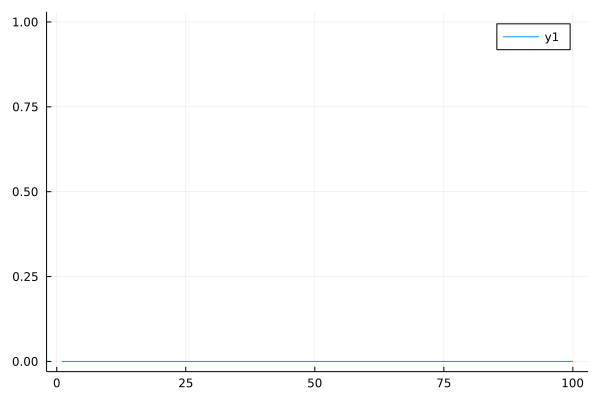

In [8]:
number_results = zeros(n)
for i in 1:n
    number_results[results[i]] = 1
end
total_elements = zeros(n)
total_elements = number_results
for i in 1:n
    if(results[i+1] == results[i])
        number_results[results[i]] = number_results[results[i]] + 1
    end
end

plot(number_results)

In [ ]:
mean = sum(results)/sum(total_elements)
variance = var(results)